# Waves in Cold Magnetized Plasma (Part 2)

## Summary of the Previous Lecture
* 2 main classes of models are available to describe the plasma response to the wave field: *fluid* models and *kinetic* models
* *Cold plasmas* are described by setting the temperature/pressure to 0 in the fluid equations
    * This allows the Stix dielectric tensor for cold plasmas to be computed
    * (it can also be done in the framework of the kinetic theory.) 
* The wave equation and *dispersion relation* reveal 2 waves (or *modes*)
    * each either propagative ($k^2 > 0$) or evanescent ($k^2 < 0$)

### Formulary
#### Fluid Density Conservation
$$
\frac{\partial n_s}{\partial t} + \nabla \cdot (n_s \underline{V_s}) = 0
$$

#### Fluid Momentum Conservation
$$
n_s m_s \left(
\frac{\partial \underline{V_s}}{\partial t} + (\underline{V}_s\cdot\nabla)\underline{V_s}
\right)
=
n_s q_s (\underline{E} + \underline{V_s} \times \underline{B})
- \nabla \cdot \underline{\underline{\Phi_s}}
$$

#### Wave Equation and Dispersion Relation
$$
\underline{\underline{M}} \cdot \underline{E} = \underline{0}
$$
with 
$$
\underline{\underline{M}} = k^2 \underline{\underline{I}} - \frac{\omega^2}{c^2} \underline{\underline{K}} - \underline{k}\underline{k}
$$
The non trivial solution of the previous equation is obtained for $\det\underline{\underline{M}}=0$ which can be solved for $\omega(\underline{k})$, the *dispersion relation*.


#### Cold Dielectric Tensor
$$
\underline{\underline{\varepsilon}} 
= \varepsilon_0 \underline{\underline{K}} 
= \varepsilon_0 \left(\underline{\underline{I}} + \frac{i}{\omega \varepsilon_0} \underline{\underline{\sigma}}\right) 
$$
with the traditionnal notation (*Stix tensor*):
$$
\underline{\underline{K}} 
= 
\left(
\begin{matrix}
S & -iD & 0 \\
iD & S & 0 \\
0 & 0 & P
\end{matrix}
\right)
$$
with
$$
S = \frac{1}{2}(R + L) = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2 - \Omega_{s}^2}
$$
$$
D = \frac{1}{2}(R - L) = \sum_s \frac{\omega_{ps}^2}{\omega} \frac{\Omega_s}{\omega^2 - \Omega_{s}^2}
$$
$$
P = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2}
$$
where $S$ stands for "sum", $D$ for "difference" and $P$ for "Plasma". 

* We also have:
$$
R = 1 - \sum_s \frac{\omega_{ps}^2}{\omega(\omega + \Omega_s)}
$$
$$
L = 1 - \sum_s \frac{\omega_{ps}^2}{\omega(\omega - \Omega_s)}
$$
The $R$ and $L$ terms arise in a derivation based on expressing the field in terms of rotating polarizations ("right" and "left") rather than the direct Cartesian approach (Stix frame).

* Once the dispersion relation is solved, it yields the polarization of the wave mode.

### Terminology
* *Perpendicular* or *Parallel* propagation, with respect to the confining magnetic field $\underline{B_0}$ 
* Waves are said to be:
    * *Longitudinal* if $\underline{E} \parallel \underline{k}$
    * *Transverse* if $\underline{E} \cdot \underline{k} = 0$ (i.e. $\underline{E} \perp \underline{k}$)    

In [1]:
import plasmapy as pp
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from scipy.constants import c
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
def filter_negative_and_positive_values(arr):
    """
    Return an array with only negative values of ``arr``
    and an array with only positive values of ``arr``.
    Each element of these arrays that does not meet the
    condition are replaced with `~numpy.nan`.
    """
    arr_neg = np.ma.masked_greater_equal(arr, 0).filled(np.nan)
    arr_pos = np.ma.masked_less_equal(arr, 0).filled(np.nan)
    return arr_neg, arr_pos

## Parallel Propagation: $\underline{k}=k\underline{\hat{z}}$ ($\theta = 0$)
The wave equations then reads:
$$
\begin{cases}
(n^2 - S) E_x & + iD E_y & & = 0 \\
-iD E_X & + (n^2 - S) E_y & &= 0 \\
& & P E_z &= 0
\end{cases}
$$
The first two and the last equation are uncoupled, so we have uncoupled perpendicular and parallel components, they have to be studied separately.

### Parallel Component
$P E_z =0 $ leads to the dispersion relation:
$$
P = 0
$$
that is,
$$
\omega^2 = \sum_s \omega_{ps}^2
$$
* the dispersion relation does not depend of $k$
* the phase velocity $v_\phi=\omega/k$ is undefined
* the group velocity $v_g=\partial\omega/\partial k = 0$ so the wave is not propagating
* Inserting this solution back into the wave equation leads to $E_x=E_y=0$: the oscillations of the electric field are parallel to $B_0$
* using Maxwell equation ($\underline{B}\propto\underline{k}\times \underline{E}$) we deduce that $\underline{B}=0$: wave is *electrostatic*
* This wave corresponds to the natural oscillation of the plasma, also known as *Langmuir* wave. 

### Perpendicular component
From
$$
\begin{cases}
(n^2 - S) E_x & + iD E_y & = 0 \\
-iD E_X & + (n^2 - S) E_y &= 0
\end{cases}
$$
and using rotating field notation
$$
E_\pm = \frac{1}{\sqrt{2}}(E_x \pm i E_y)
$$
we obtain
$$
\begin{cases}
(L - n^2) E_+ = 0 & \text{L or ion mode}\\
(R - n^2) E_- = 0 & \text{R or electron mode}
\end{cases}
$$
where $R=S+D$ and $L=S-D$. These two modes are the *whistler* modes.

#### Ion Whistler
* Dispersion relation:
$$
n^2 = 1 - \frac{\omega_{pe}^2}{\omega(\omega + \Omega_{e})} - \frac{\omega_{pi}^2}{\omega(\omega - \Omega_{i})} 
$$
* cutoff: $\omega_L=\frac{\Omega_i - \Omega_e}{2} + \sqrt{\left( \frac{\Omega_i + \Omega_e}{2} \right)^2 + \omega_p^2}$ with $\omega_p^2=\sum_s \omega_{ps}^2$
* resonance: $\omega = \Omega_{ci}$
* limits:
    * $\omega \to 0$: $n^2 = 1$
    * $\omega \to +\infty$: $n^2\to c^2 / v_A^2$ with $v_A = B_0/\sqrt{\mu_0\sum_s n_s m_s}$ the Alvèn Speed.
* Inserting this solution in wave equations leads to $E_- = 0$ and $E_x / E_y = + i$: this is a circular polarization, Efield rotates in the same direction than ions (hence the name).


In [3]:
def n_square_ion_whistler(omega, B0=3*u.T, ni=1e15/u.m**3):
    Omega_ci = pp.formulary.frequencies.gyrofrequency(B0, 'p')
    Omega_ce = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
    omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')    
    return 1 - omega_pe**2/(omega * (omega + Omega_ce)) - omega_pi**2/(omega * (omega - Omega_ci))

In [4]:
def plot_ion_whistler(B0, ni):
    # B0 in T, ni in log10
    w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
    B0 = B0*u.T
    ni = 10**ni/u.m**3
    # various quantities
    v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
    Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
    Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
    omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
    omega_p = np.sqrt(omega_pi**2 + omega_pe**2)
    omega_L = (Omega_i - Omega_e)/2 + np.sqrt(((Omega_i+Omega_e)/2)**2 + omega_p**2)
    # n^2 vs w
    n_sq_neg_ion, n_sq_pos_ion = filter_negative_and_positive_values(n_square_ion_whistler(w, B0, ni))
        
    fig, ax = plt.subplots()
    # limits
    ax.axhline((c/v_a.value)**2, color='darkred', ls='--')
    ax.axhline(1, color='darkred', ls='--')    
    # Cutoff and Resonances
    ax.axvline(Omega_i.value, color='gray', ls='--')
    ax.axvline(omega_L.value, color='gray', ls='--')
    # n^2 vs w
    ax.semilogx(w, n_sq_pos_ion, lw=2)
    ax.semilogx(w, n_sq_neg_ion, lw=2, color='C0', ls='--')
    # axis properties
    ax.set_ylim(-5*(c/v_a.value)**2, +5*(c/v_a.value)**2)
    ax.set_xlabel('$\omega$'); ax.set_ylabel('$n_\perp^2$')
    ax.set_title('Ion Whistler Dispersion Relation')

In [5]:
interact(plot_ion_whistler, B0=3, ni=18)

interactive(children=(IntSlider(value=3, description='B0', max=9, min=-3), IntSlider(value=18, description='ni…

<function __main__.plot_ion_whistler(B0, ni)>

#### Electron Whistler
* Dispersion relation:
$$
n^2 = 1 - \frac{\omega_{pe}^2}{\omega(\omega - \Omega_{e})} - \frac{\omega_{pi}^2}{\omega(\omega + \Omega_{i})} 
$$

* cutoff: $\omega_R=\frac{\Omega_e - \Omega_i}{2} + \sqrt{\left( \frac{\Omega_i + \Omega_e}{2} \right)^2 + \omega_p^2}$ with $\omega_p^2=\sum_s \omega_{ps}^2$
* resonance: $\omega = \Omega_{ce}$
* limits:
    * $\omega \to 0$: $n^2 = 1$
    * $\omega \to +\infty$: $n^2 = 1$    
* Inserting this solution in wave equations leads to $E_+ = 0$: this is a circular polarization, Efield rotates in the same direction than electrons (hence the name).
* Phase velocity: $v_\phi \approx c\sqrt{\frac{\omega\Omega_e}{\omega_{pe}^2}}$
* Group velocity: $v_g = 2v_\phi$
* Note that both velocities depends on $\propto \sqrt{\omega}$
    * the *dispersity* of this wave is large 
    * the high frequency components of the wave propagate faster than the low frequency components, leading to this "whistling" tone (hence the name).

In [6]:
def n_square_electron_whistler(omega, B0=3*u.T, ni=1e15/u.m**3):
    Omega_ci = pp.formulary.frequencies.gyrofrequency(B0, 'p')
    Omega_ce = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
    omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')    
    return 1 - omega_pe**2/(omega * (omega - Omega_ce)) - omega_pi**2/(omega * (omega + Omega_ci))

In [7]:
def plot_electron_whistler(B0, ni):
    # B0 in T, ni in log10
    w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
    B0 = B0*u.T
    ni = 10**ni/u.m**3
    # various quantities
    v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
    Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
    Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
    omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
    omega_p = np.sqrt(omega_pi**2 + omega_pe**2)
    omega_R = (Omega_e - Omega_i)/2 + np.sqrt(((Omega_i+Omega_e)/2)**2 + omega_p**2)
    # n^2 vs w
    n_sq_neg_ion, n_sq_pos_ion = filter_negative_and_positive_values(n_square_electron_whistler(w, B0, ni))
        
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    # limits
    ax1.axhline((c/v_a.value)**2, color='darkred', ls='--')
    ax2.axhline((c/v_a.value)**2, color='darkred', ls='--')
    ax1.axhline(1, color='darkred', ls='--')    
    ax2.axhline(1, color='darkred', ls='--')    
    # Cutoff and Resonances
    ax2.axvline(1, color='gray', ls='--')
    ax2.axvline(omega_R.value/Omega_e.value, color='gray', ls='--')
    # n^2 vs w
    ax1.semilogx(w, n_sq_pos_ion, lw=2)
    ax1.semilogx(w, n_sq_neg_ion, lw=2, color='C0', ls='--')    
    ax2.plot(w/Omega_e.value, n_sq_pos_ion, lw=2)
    ax2.plot(w/Omega_e.value, n_sq_neg_ion, lw=2, color='C0', ls='--')
    # axis properties
    ax1.set_ylim(-5*(c/v_a.value)**2, +5*(c/v_a.value)**2)
    ax1.set_xlabel('$\omega$'); ax1.set_ylabel('$n_\perp^2$')    
    ax2.set_xlim(1 - 1/2, 1 + 1/2); ax2.set_ylim(bottom=-2, top=4)
    ax2.set_xlabel('$\omega/\Omega_e$'); ax2.set_ylabel('$n_\perp^2$')
    
    fig.suptitle('Electron Whistler Dispersion Relation')

In [8]:
interact(plot_electron_whistler, B0=3, ni=19)

interactive(children=(IntSlider(value=3, description='B0', max=9, min=-3), IntSlider(value=19, description='ni…

<function __main__.plot_electron_whistler(B0, ni)>

### Numerical Resolution of the Dispersion Relation
Here we solve the dispersion relation numerically using the [PlasmaPy](https://docs.plasmapy.org/en/stable/api/plasmapy.dispersion.analytical.stix_.stix.html#stix) Python library. Here, both wave modes are solved at the same time and will appear in different colors in the plot below. Plain lines correspond to propagative modes ($n^2 > 0$) and dashed lines to evanescent modes ($n^2<0$).

In [9]:
w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
ni = [1e18] * u.m**-3
B0 = 2 * u.T
theta = 0 * u.deg
ions = ['p']

inputs = {
    "B": B0,
    "w": w,
    "ions": ions,
    "n_i": ni,
    "theta": theta,
}
# Solving for k(omega)
k =  pp.dispersion.analytical.stix(**inputs)
# reexpressing as n^2 as above
n_perp = (k.T /(w/c) )**2  # n^2 = (k/k0)^2

In [10]:
# filtering negative and positive n^2 for convenience plotting in loglog
n_sq_neg1, n_sq_pos1 = filter_negative_and_positive_values(n_perp[0,:])
n_sq_neg2, n_sq_pos2 = filter_negative_and_positive_values(n_perp[3,:])

In [11]:
# Define some particular quantities
v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
omega_p = np.sqrt(omega_pi**2 + omega_pe**2)
omega_L = (Omega_i-Omega_e)/2 + np.sqrt(((Omega_i + Omega_e)/2)**2 + omega_p**2)
omega_R = (Omega_e-Omega_i)/2 + np.sqrt(((Omega_i + Omega_e)/2)**2 + omega_p**2)

c:\Users\JH218595\Documents\PlasmaPy\plasmapy\utils\decorators\checks.py:1407: RelativityWarning: Alfven_speed is yielding a velocity that is 14.547% of the speed of light. Relativistic effects may be important.
  warnings.warn(


Text(0.5, 1.0, 'Cold Plasma Dispersion - Parallel Propagation')

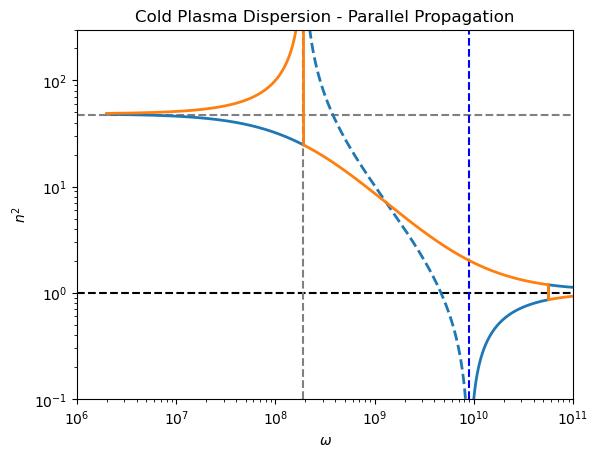

In [12]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axhline((c/v_a.value)**2, color='gray', ls='--')
ax.axvline(Omega_i.value, color='gray', ls='--')
ax.axvline(Omega_e.value, color='gray', ls='--')
ax.axvline(omega_L.value, color='blue', ls='--')
ax.axvline(omega_R.value, color='red', ls='--')
ax.loglog(w, np.abs(n_sq_pos1), lw=2)
ax.loglog(w, np.abs(n_sq_neg1), lw=2, color='C0', ls='--')
ax.loglog(w, np.abs(n_sq_pos2), lw=2)
ax.loglog(w, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(0.1, 300)
ax.set_xlim(1e6, 1e11)
ax.set_xlabel('$\omega$'); ax.set_ylabel('$n^2$')
ax.set_title('Cold Plasma Dispersion - Parallel Propagation')

Text(0.5, 1.0, 'Cold Plasma Dispersion - Parallel Propagation (normalized and zoomed)')

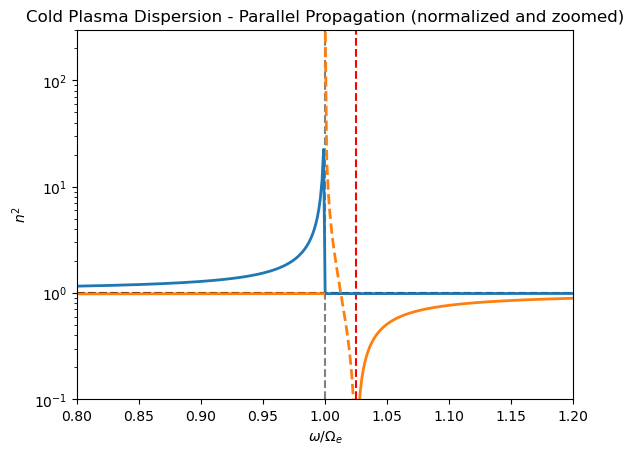

In [13]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axvline(Omega_e.value/Omega_e.value, color='gray', ls='--')
ax.axvline(omega_R.value/Omega_e.value, color='red', ls='--')
ax.semilogy(w/Omega_e.value, np.abs(n_sq_pos1), lw=2)  # pos n_perp^2 in plain lines
ax.semilogy(w/Omega_e.value, np.abs(n_sq_neg1), lw=2, color='C0', ls='--')  # neg n_perp^2 in dashed lines
ax.semilogy(w/Omega_e.value, np.abs(n_sq_pos2), lw=2)
ax.semilogy(w/Omega_e.value, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(0.1, 300)
ax.set_xlim(1 - 0.2, 1 + 0.2)
ax.set_xlabel('$\omega/\Omega_e$'); ax.set_ylabel('$n^2$')
ax.set_title('Cold Plasma Dispersion - Parallel Propagation (normalized and zoomed)')

## Perpendicular Propagation: $\underline{k}=k\underline{\hat{x}}$
The wave equations then reads:
$$
\begin{cases}
S E_x & - iD E_y & & = 0 \\
iD E_x & + (S - n^2) E_y & &= 0 \\
& & (P - n^2) E_z &= 0
\end{cases}
$$
Again, there is a complete decoupling between perpendicular and parallel components, they have to be studied separately.

### Parallel Component: Ordinary mode
* The dispersion relation is
$$
n^2 = P = 1 - \frac{\omega_{pi}^2}{\omega^2} - \frac{\omega_{pe}^2}{\omega^2}
$$
* cutoff: $\omega^2=\sum_s \omega_{ps}^2$
* resonance: no resonance
* limits:
    * $\omega \to 0$: $n^2 \to -\infty$
    * $\omega \to +\infty$: $n^2 \to 1$
* polarization: $E_x=E_y=0$
    * electric field aligned with $B_0$
* independant of $B_0$
    * convenient for diagnostics, ex: interferometry ($\omega \gg \omega_{pe}$)
    

In [24]:
def n_square_Omode(omega, B0=3*u.T, ni=1e15/u.m**3):
    omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')    
    return 1 - omega_pe**2/omega**2 - omega_pi**2/omega**2

In [25]:
def plot_Omode(B0, ni):
    # B0 in T, ni in log10
    w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
    B0 = B0*u.T
    ni = 10**ni/u.m**3
    # various quantities
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
    omega_p = np.sqrt(omega_pi**2 + omega_pe**2)
    # n^2 vs w
    n_sq_neg_ion, n_sq_pos_ion = filter_negative_and_positive_values(n_square_Omode(w, B0, ni))
        
    fig, ax = plt.subplots()
    # limits
    ax.axhline(1, color='darkred', ls='--')    
    # Cutoff and Resonances
    ax.axvline(omega_pe.value/omega_pe.value, color='gray', ls='--')
    # n^2 vs w
    ax.plot(w/omega_pe.value, n_sq_pos_ion, lw=2)
    ax.plot(w/omega_pe.value, n_sq_neg_ion, lw=2, color='C0', ls='--')
    # axis properties
    ax.set_ylim(-10, +2)
    ax.set_xlabel('$\omega/\omega_{pe}$'); ax.set_ylabel('$n_\perp^2$')
    ax.set_title('O-mode Dispersion Relation')

In [27]:
interact(plot_Omode, B0=3, ni=19) # note it does not depends on B0

interactive(children=(IntSlider(value=3, description='B0', max=9, min=-3), IntSlider(value=19, description='ni…

<function __main__.plot_Omode(B0, ni)>

### Perpendicular Component: eXtraorinary mode
From:
$$
\begin{cases}
S E_x & - iD E_y & & = 0 \\
iD E_x & + (S - n^2) E_y & &= 0 \\
\end{cases}
$$
* the dispersion relation is 
$$
n^2 = \frac{S^2 - D^2}{S} = \frac{RL}{S}
$$
* 2 cutoffs:
$$
\omega = \pm \frac{\Omega_e - \Omega_i}{2} + \sqrt{\left( \frac{\Omega_i + \Omega_e}{2} \right)^2 + \omega_p^2}
$$
* 2 resonances:
$$
\omega = \frac{\omega_{uh} - \omega_{lh}}{2} \pm \sqrt{\left( \frac{\omega_{pi} - \omega_{pe}}{2} \right)^2 + \omega_{pe}^2 \omega_{pi}^2}
$$
where $\omega_{uh}$ and $\omega_{lh}$ are the *upper hybrid* and *lower hybrid* frequencies defined by: 
$\omega_{uh}^2 = \omega_{pe}^2 + \Omega_{e}^2$ and $\omega_{lh}^2 = \omega_{pi}^2 + \Omega_{i}^2$

* limits:
    * $\omega \to 0$: $n^2 \to c^2/v_a^2$ like for whistlers
    * $\omega \to +\infty$: $n^2 \to 1$
    

* polarization: $E_z = $ and $E_x/E_y = i D/S$, i.e. an elliptic polarization with $E$ perpendicular to $B_0$
    * as $\omega\to\Omega_i$, $E_x/E_y \to -i$ ($E_+\to0$): the electric component which rotates in the same direction as the ions vanishes at the ion cyclotron frequency
    * as $\omega\to\Omega_e$, $E_x/E_y \to i$ ($E_-\to0$): the electric component which rotates in the same direction as the electrons vanishes at the electron cyclotron frequency  
    * This phenomena is called the *screening effect* and results in significant reduction of the interaction between the wave and the particles at the cyclotron resonance! This has important consequence for Ion Cyclotron Resonance Heating in particular: additional ion species must be incorpored in the plasma in order to circumvent this effect by heating a *minority* species, while the propagation properties of the wave are dicted by the *majority* species.

In [28]:
def n_square_Xmode(omega, B0=3*u.T, ni=1e15/u.m**3):
    species = ['e','D+']
    L, R, P = pp.formulary.dielectric.cold_plasma_permittivity_LRP(B0, species, ni, omega)
    S, D, P = pp.formulary.dielectric.cold_plasma_permittivity_SDP(B0, species, ni, omega)
    return R*L/S

In [29]:
def plot_Xmode(B0, ni):
    # B0 in T, ni in log10
    w = 2*np.pi*np.logspace(5.5, 11, 10001) * u.rad / u.s
    B0 = B0*u.T
    ni = 10**ni/u.m**3
    # various quantities
    omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
    omega_lh = pp.formulary.frequencies.lower_hybrid_frequency(B0, n_i=ni, ion=['D+'])
    omega_uh = pp.formulary.frequencies.upper_hybrid_frequency(B0, n_e=ni)
    Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
    # n^2 vs w
    n_sq_neg_ion, n_sq_pos_ion = filter_negative_and_positive_values(n_square_Xmode(w, B0, [ni]))
        
    fig, ax = plt.subplots()
    # limits
    ax.axhline(1, color='darkred', ls='--')    
    # Cutoff and Resonances
    ax.axvline(omega_lh.value/Omega_e.value, color='red', ls='--')
    ax.axvline(omega_uh.value/Omega_e.value, color='blue', ls='--')
    
    # n^2 vs w
    ax.plot(w/Omega_e.value, n_sq_pos_ion, lw=2)
    ax.plot(w/Omega_e.value, n_sq_neg_ion, lw=2, color='C0', ls='--')
    # axis properties
    ax.set_ylim(-5, +5)
    ax.set_xlabel('$\omega$/$\Omega_e$'); ax.set_ylabel('$n_\perp^2$')
    ax.set_title('X-mode Dispersion Relation')

In [31]:
interact(plot_Xmode, B0=3, ni=19) 

interactive(children=(IntSlider(value=3, description='B0', max=9, min=-3), IntSlider(value=19, description='ni…

<function __main__.plot_Xmode(B0, ni)>

### Numerical Solving of the Dispersion Relation

In [32]:
w = 2*np.pi*np.logspace(7, 11, 10001) * u.rad / u.s
ni = [1e18] * u.m**-3
B0 = 2 * u.T
theta = 90 * u.deg
ions = ['p']

inputs = {
    "B": B0,
    "w": w,
    "ions": ions,
    "n_i": ni,
    "theta": theta,
}

k =  pp.dispersion.analytical.stix(**inputs)
n_perp = (k.T /(w/c) )**2  # n^2 = (k/k0)^2

In [33]:
# filtering negative and positive n^2 for convenience plotting in loglog
n_sq_neg1, n_sq_pos1 = filter_negative_and_positive_values(n_perp[0,:])
n_sq_neg2, n_sq_pos2 = filter_negative_and_positive_values(n_perp[3,:])

In [34]:
# Define some particular quantities
v_a = pp.formulary.Alfven_speed(B0, ni, 'p')
Omega_i = pp.formulary.frequencies.gyrofrequency(B0, 'p')
Omega_e = pp.formulary.frequencies.gyrofrequency(B0, 'e-')
omega_pi = pp.formulary.frequencies.plasma_frequency(ni, 'p')
omega_pe = pp.formulary.frequencies.plasma_frequency(ni, 'e-')
omega_p = np.sqrt(omega_pi**2 + omega_pe**2)

Text(0, 0.5, '$n_\\perp^2$')

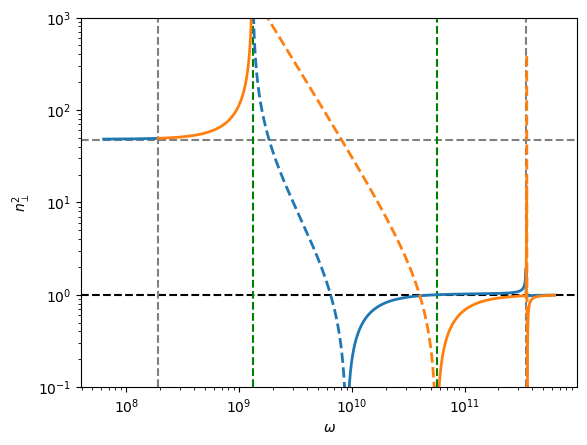

In [35]:
fig, ax = plt.subplots()
ax.axhline(1, color='k', ls='--')
ax.axhline((c/v_a.value)**2, color='gray', ls='--')
ax.axvline(Omega_i.value, color='gray', ls='--')
ax.axvline(Omega_e.value, color='gray', ls='--')
ax.axvline(omega_pi.value, color='green', ls='--')
ax.axvline(omega_pe.value, color='green', ls='--')
ax.loglog(w, np.abs(n_sq_pos1), lw=2)  # pos n_perp^2 in plain lines
ax.loglog(w, np.abs(n_sq_neg1), lw=2, color='C0', ls='--') # neg n_perp^2 in dashed lines
ax.loglog(w, np.abs(n_sq_pos2), lw=2)
ax.loglog(w, np.abs(n_sq_neg2), lw=2, color='C1', ls='--')
ax.set_ylim(bottom=0.1, top=1e3)
ax.set_xlabel('$\omega$'); ax.set_ylabel('$n_\perp^2$')

## Arbitrary Propagation Angle
* The case of arbitrary propagation angle with respect to the confining magnetic field direction is conceptually similar
    * always two distincts modes in a cold plasma 
    * but more difficult to treat analytically.
* When the propagation angle varies from perpendicular to parallel:
    * X-mode transforms in one of the two whistler modes
    * and O-mode becomes the other whistler
* In some particular cases, however, an analytical treatment is possible

### Intermediate range of frequencies
When 
$$ \Omega_i, \omega_{pi} \ll \omega \ll |\Omega_e|, \omega_{pe} $$
Using $n_\perp^2 = n^2 - n_\parallel^2$, the two solutions of the dispersion relation can be written approximatively as:
$$
n_{\perp, F}^2 = - \frac{(n_\parallel^2 - R)(n_\parallel^2 - L}{n_\parallel^2 - S}
$$
and
$$
n_{\perp, S}^2 = - \frac{P}{S} (n^2_\parallel - S)
$$
Where the labels $S$ and $F$ stands for "Slow" and "Fast":
* generally $n_{\perp, S} \gg n_{\perp, F}$
* so the phase velocities ($v_\phi = c/n$) of the slow wave is smaller than the phase velocity of the fast wave
* hence their names

* $n_{\perp, S}^2 \to \infty$ for $S\to 0$: *lower hybrid resonance*
* Its associated polarization is $E_x/E_z \approx n_\perp / n_\parallel = \sqrt{-P/S}$ which shows that $\underline{E}$ is parallel to $\underline{k}$ ($\underline{n_\perp} = \underline{n} \cdot \underline{\hat{x}}$ per def) and the wave becomes electrostatic as it approaches the resonance.



### Alfvèn Waves
In the MHD Limit, that is for $\omega \ll \Omega_i$, the cold dielectric tensor expressions simplify and it is possible to express the dispersion relation for an arbitrary angle w.r.t. magnetic field. Two wave modes are then found:
* $E_x\neq 0$, $E_y=E_z=0$: Torsional mode
* $E_y\neq 0$; $E_x=E_z=0$: Compressional mode